<a href="https://colab.research.google.com/github/TonioHathos/AI_Valeo/blob/main/code_Antoine/R%C3%A9duction_de_dimension_Antoine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importation librairies

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

from sklearn.preprocessing import StandardScaler

# I prepared these libraries for you
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from andrea_models import subsample
from visualization import silhouette_diagram, plot_conf_mat, \
                      false_positive_rate, evaluate_anomaly_detector


--2023-05-31 12:09:51--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190 (3.1K) [text/plain]
Saving to: ‘andrea_models.py’

andrea_models.py    100%[===================>]   3.12K  --.-KB/s    in 0s      

2023-05-31 12:09:51 (44.5 MB/s) - ‘andrea_models.py’ saved [3190/3190]

--2023-05-31 12:09:51--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTT

## Récupération dataset

In [3]:
! rm -f *.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/df_training_mod.csv
df_training_mod = pd.read_csv('df_training_mod.csv')

--2023-05-31 12:09:56--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/df_training_mod.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2666373 (2.5M) [text/plain]
Saving to: ‘df_training_mod.csv’

df_training_mod.csv 100%[===================>]   2.54M  --.-KB/s    in 0.04s   

2023-05-31 12:09:57 (58.8 MB/s) - ‘df_training_mod.csv’ saved [2666373/2666373]



### Diviser labels et colonnes

In [4]:
true_labels = df_training_mod['Binar OP130_Resultat_Global_v'].copy()

In [ ]:
true_labels.sum()

305

In [5]:
df = df_training_mod.drop(columns=['Binar OP130_Resultat_Global_v', 'Unnamed: 0'])

### Scaling

In [6]:
scaler = StandardScaler()
X_data = scaler.fit_transform(df)

## Détermination de la matrice de valeurs propres

The  12  singular values are
[322.01873073 228.88927205 205.00038038 196.73690539 194.69464665
 179.43690308 167.56208059 165.40706861 137.56003517 120.4586929
 101.21785289  90.24855551]

 The variances of the principal components are



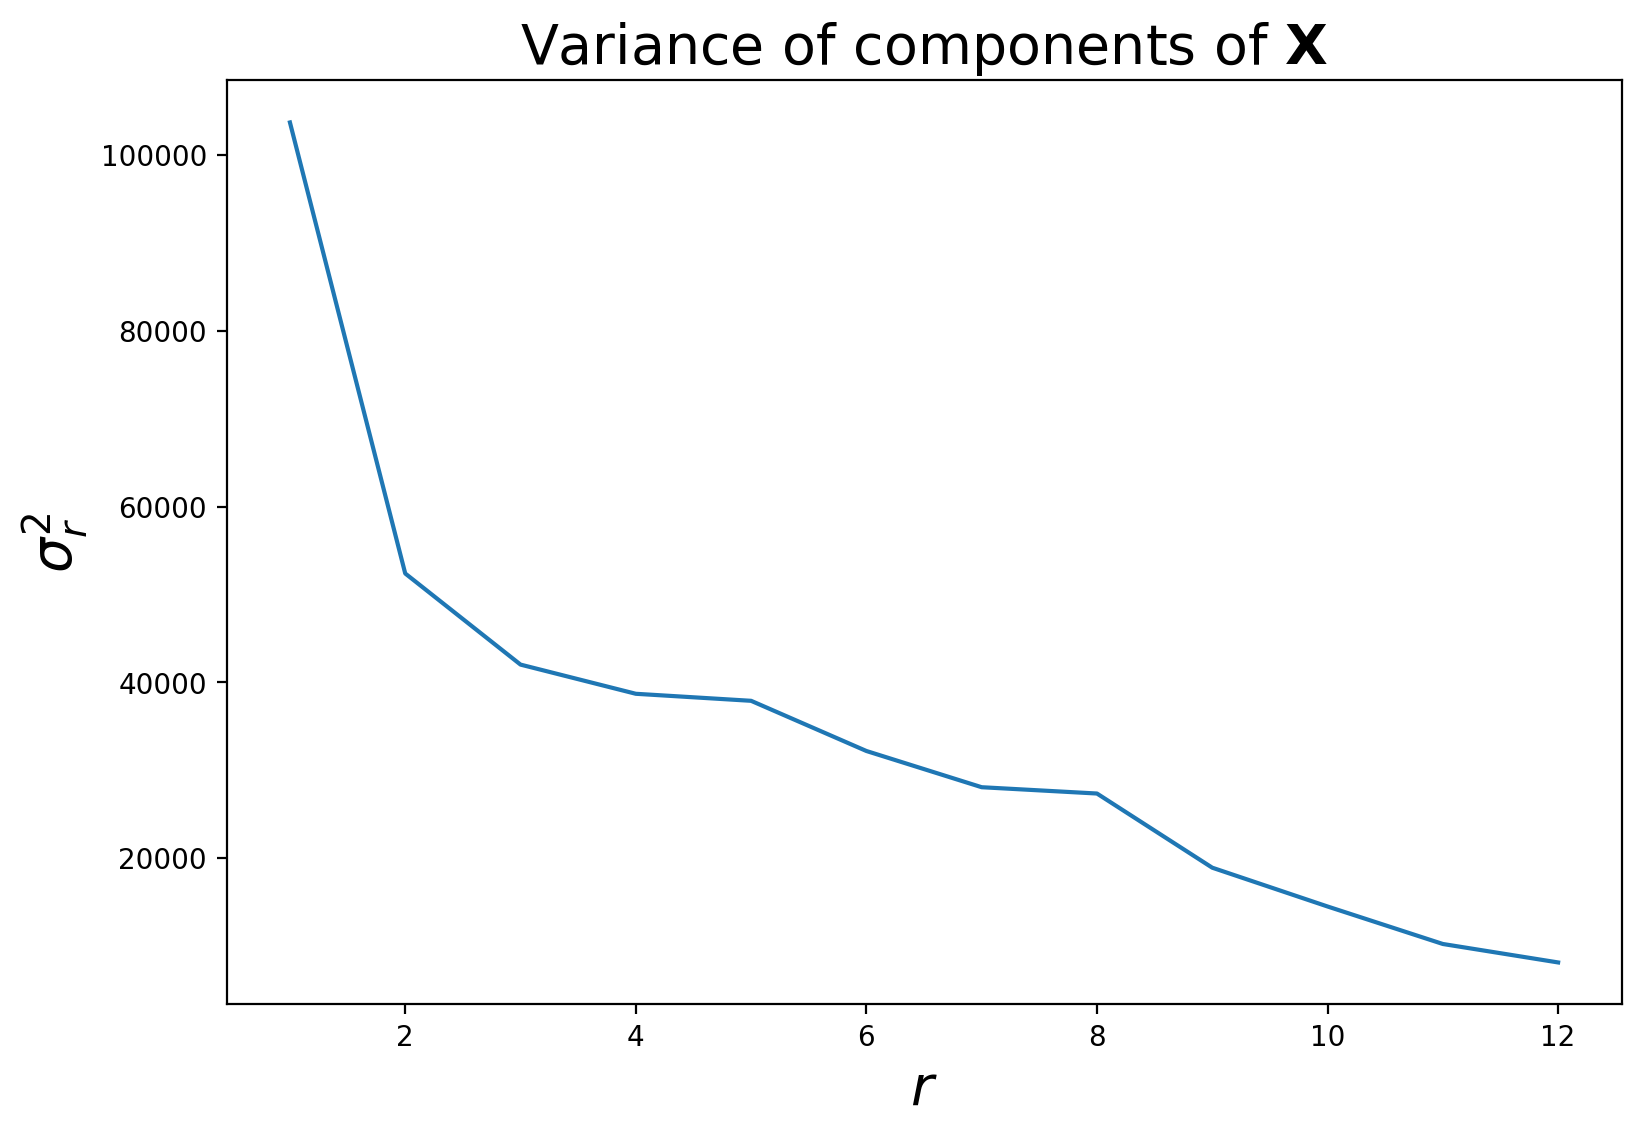

In [7]:
U,Sigma,Vt = np.linalg.svd(X_data,full_matrices=False)

print("The ", len(Sigma), " singular values are")
print(Sigma)

Sigma_squared = np.square(Sigma)

### Plotting
print("\n The variances of the principal components are")
fig = plt.figure(figsize=(9,6))
plt.plot(range(1,1+len(Sigma_squared)),Sigma_squared)
plt.xlabel(r'$r$',size=20)
plt.ylabel(r'$\sigma_r^2$',size=20)
plt.title(r'Variance of components of $\mathbf{X}$',size=20)
print('')

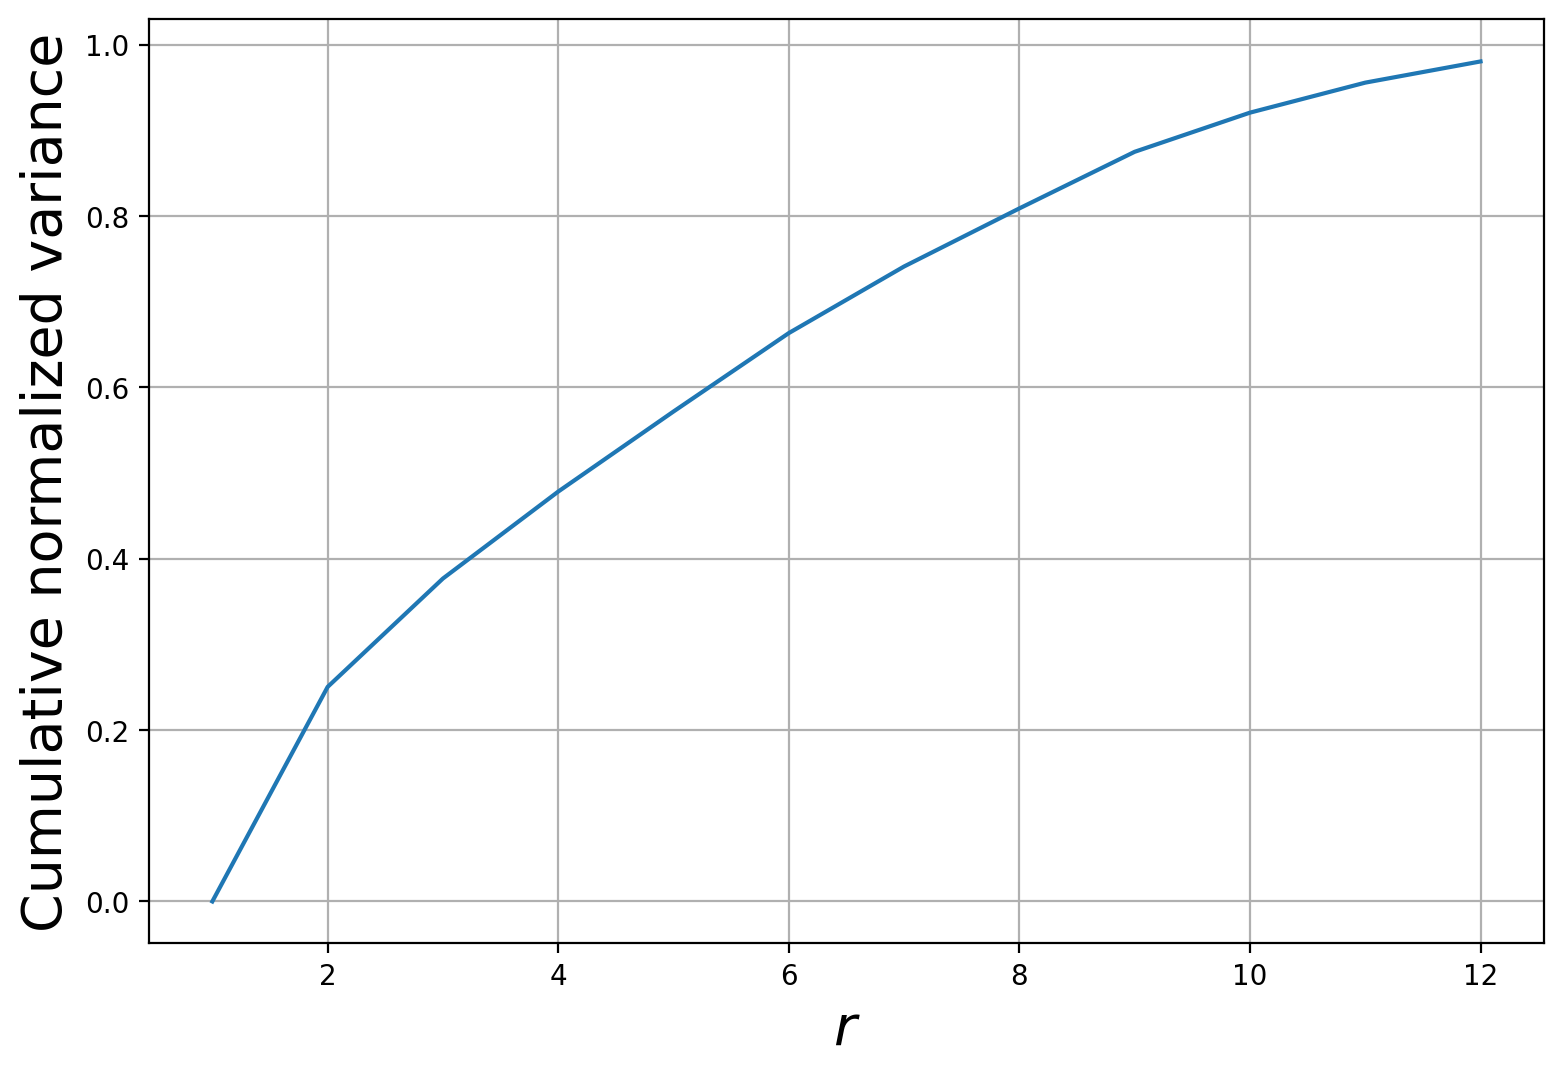

In [8]:
total_variance = sum(Sigma_squared)
cumul = [ sum(Sigma_squared[0:i]/total_variance) for i in range(len(Sigma_squared))]

### Plotting
fig = plt.figure(figsize=(9,6))
plt.plot(range(1,1+len(cumul)),cumul)
plt.xlabel(r'$r$',size=20)
plt.ylabel(r'Cumulative normalized variance',size=20)
plt.grid(visible=True)

## Calcul de la norme du traffic anormal

L (34515, 12)
X_data (34515, 12)


Text(0, 0.5, "Score d'anomalie de la mesure")

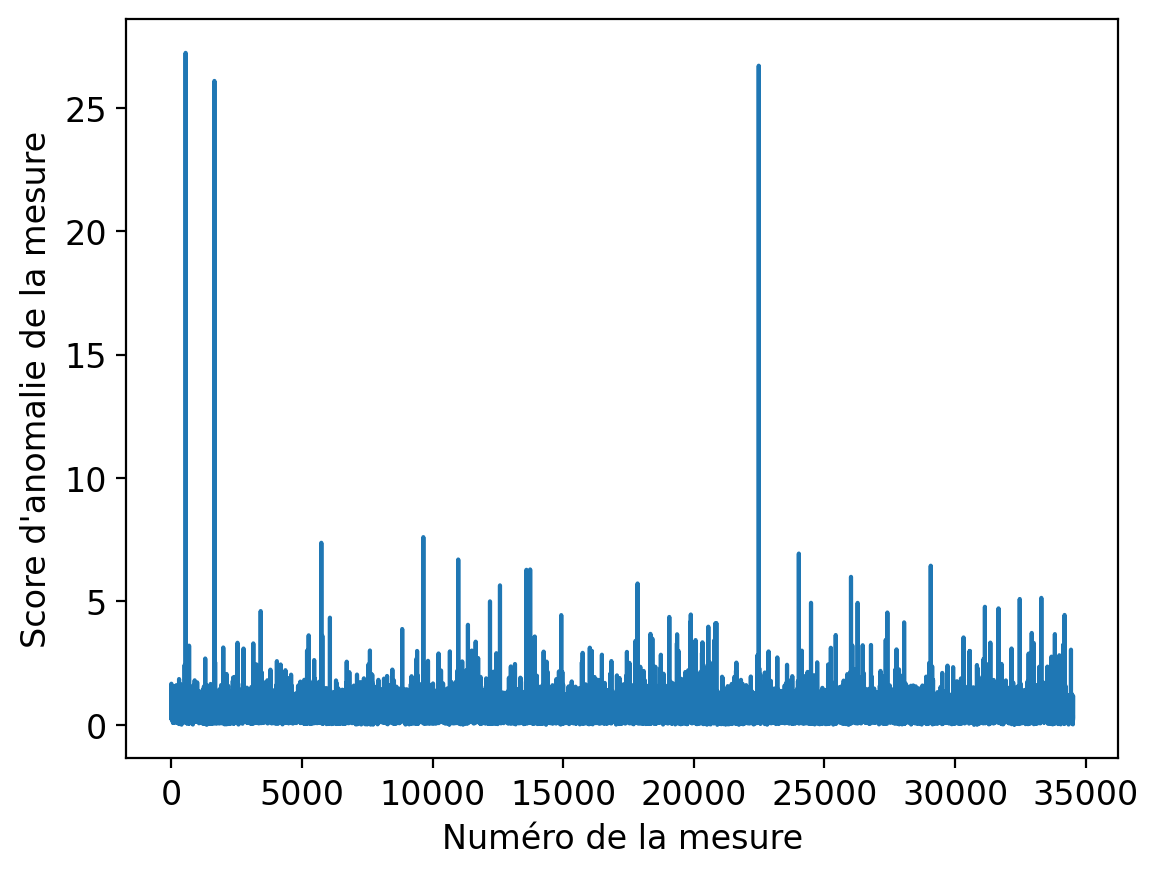

In [19]:
r=10 # Number of components

U_r = U[:,0:r]
Sigma_r = np.diag(Sigma[0:r])
V_r_t = Vt[0:r,:]

L = np.dot(U_r, np.dot(Sigma_r, V_r_t) )

print ("L", L.shape)
print ("X_data", X_data.shape)

O = X_data - L

# For each time-slot, it quantifies the "amount of anormality"
Onorm = np.linalg.norm(O,axis=1) 


### Plotting
plt.plot(Onorm)
plt.xlabel('Numéro de la mesure')
plt.ylabel("Score d'anomalie de la mesure")
#plt.title(r'$\ell_2$ Norm of Anomalous piece')

In [10]:
Onorm

array([0.34790818, 0.98957258, 0.2852198 , ..., 0.37967009, 1.18005888,
       0.2717914 ])

## Déterminer la courbe ROC et Précision/rappel

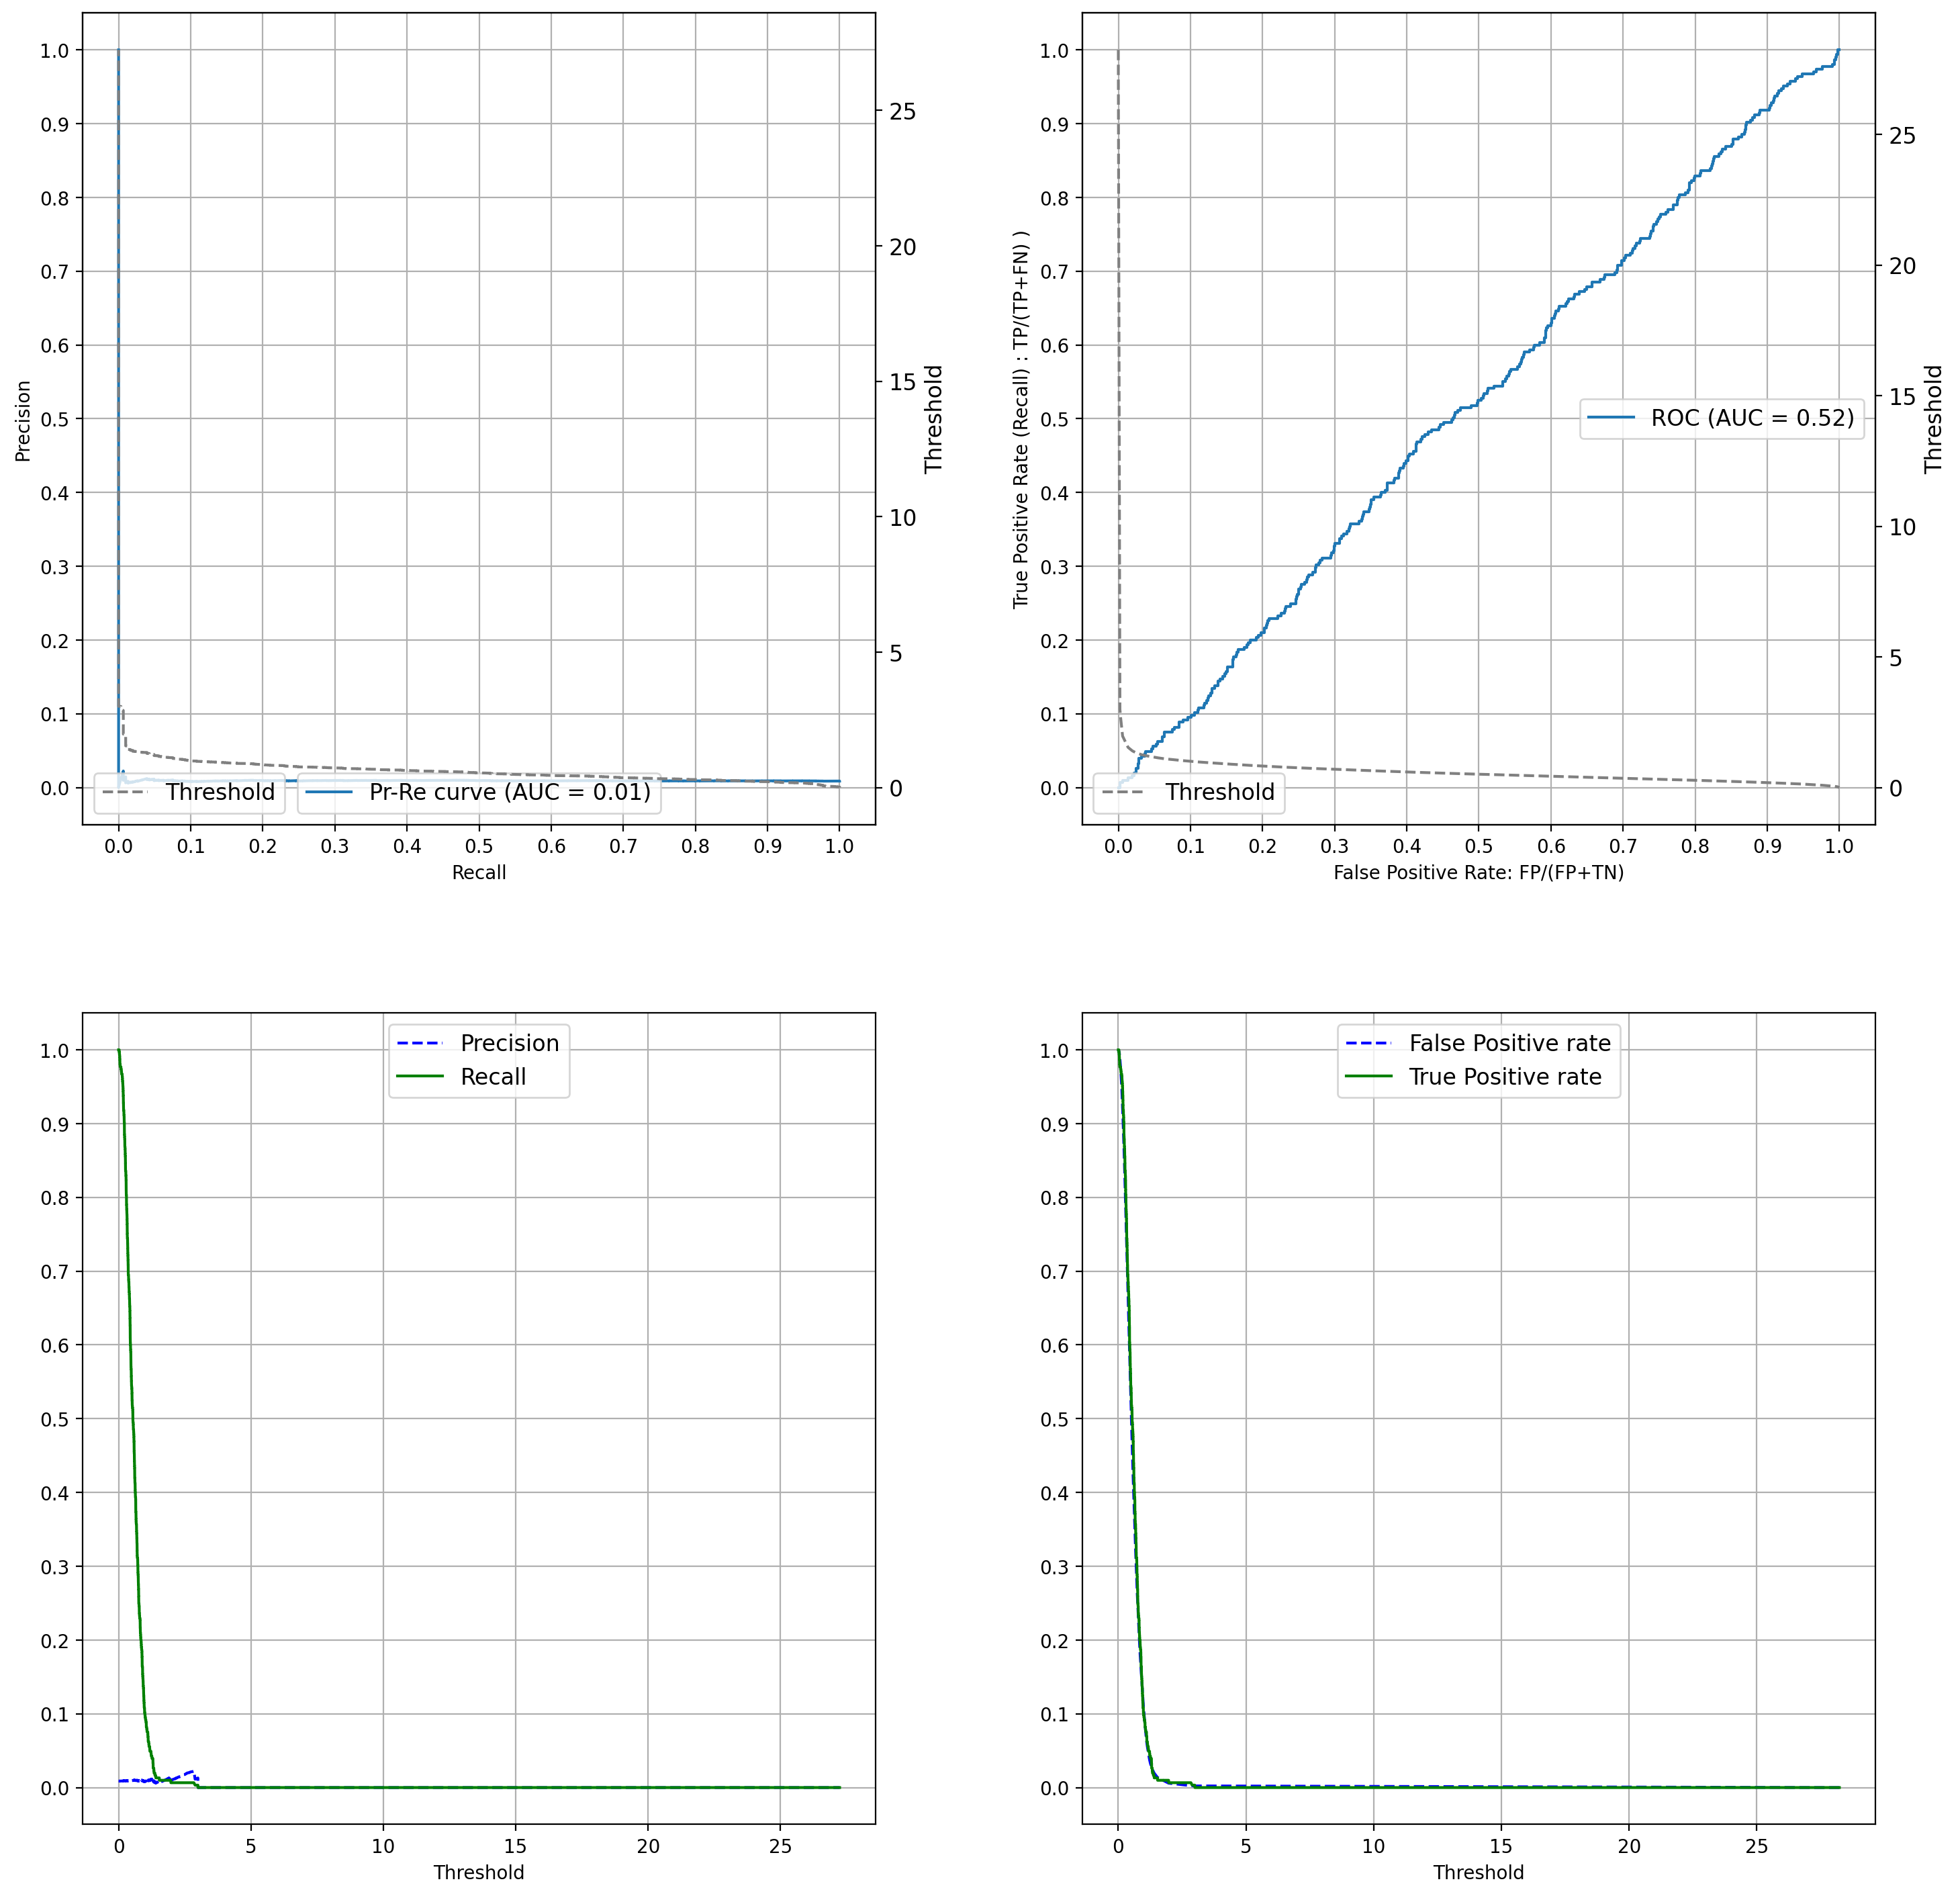

In [11]:
evaluate_anomaly_detector(true_labels, Onorm)
     

## Interprétation

Notre classifieur d'anomalie en utilisant uniquement la réduction de dimension est très mauvais: Il s'agit d'un classifieur aléatoire :-(

Essayons quand même de déterminer pour les 305 plus gros scores d'anomalies s'il s'agit véritablement d'anomalies

In [12]:
# choose the top 10 anomalous
anomalies = np.argsort(Onorm)[-305:]

In [13]:
X_data.shape[0]

34515

Text(0.5, 0, 'Numéro mesure')

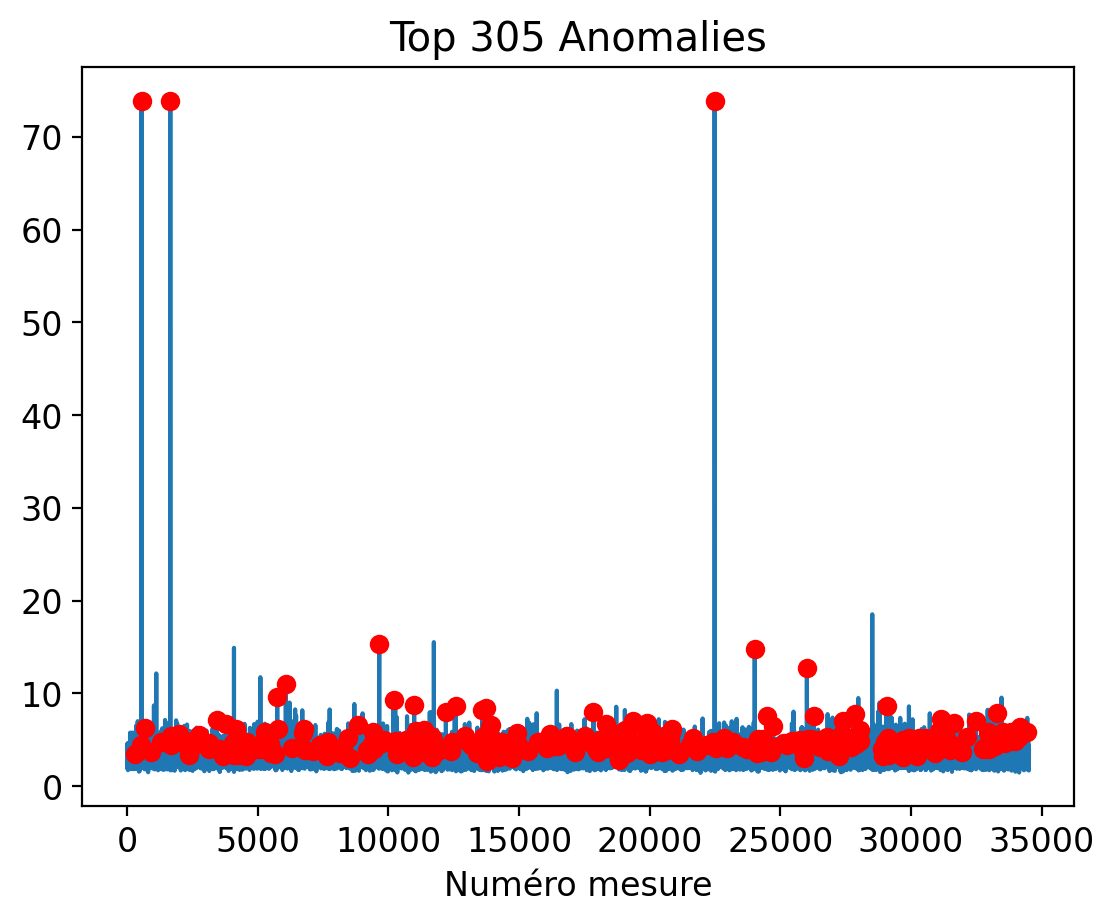

In [21]:
### Plotting
Xnorm = np.linalg.norm(X_data,axis=1)
plt.plot(Xnorm)

# Them, plot a circle per each anomalous time interval
plt.plot(anomalies,Xnorm[anomalies],'ro')
plt.title('Top 305 Anomalies')
plt.xlabel('Numéro mesure')

In [15]:
y_pred = np.zeros(X_data.shape[0])
for i in anomalies:
  y_pred[i]=1

In [16]:
y_pred.sum()

305.0

Normalized confusion matrix
[[0.99117217 0.00882783]
 [0.99016393 0.00983607]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

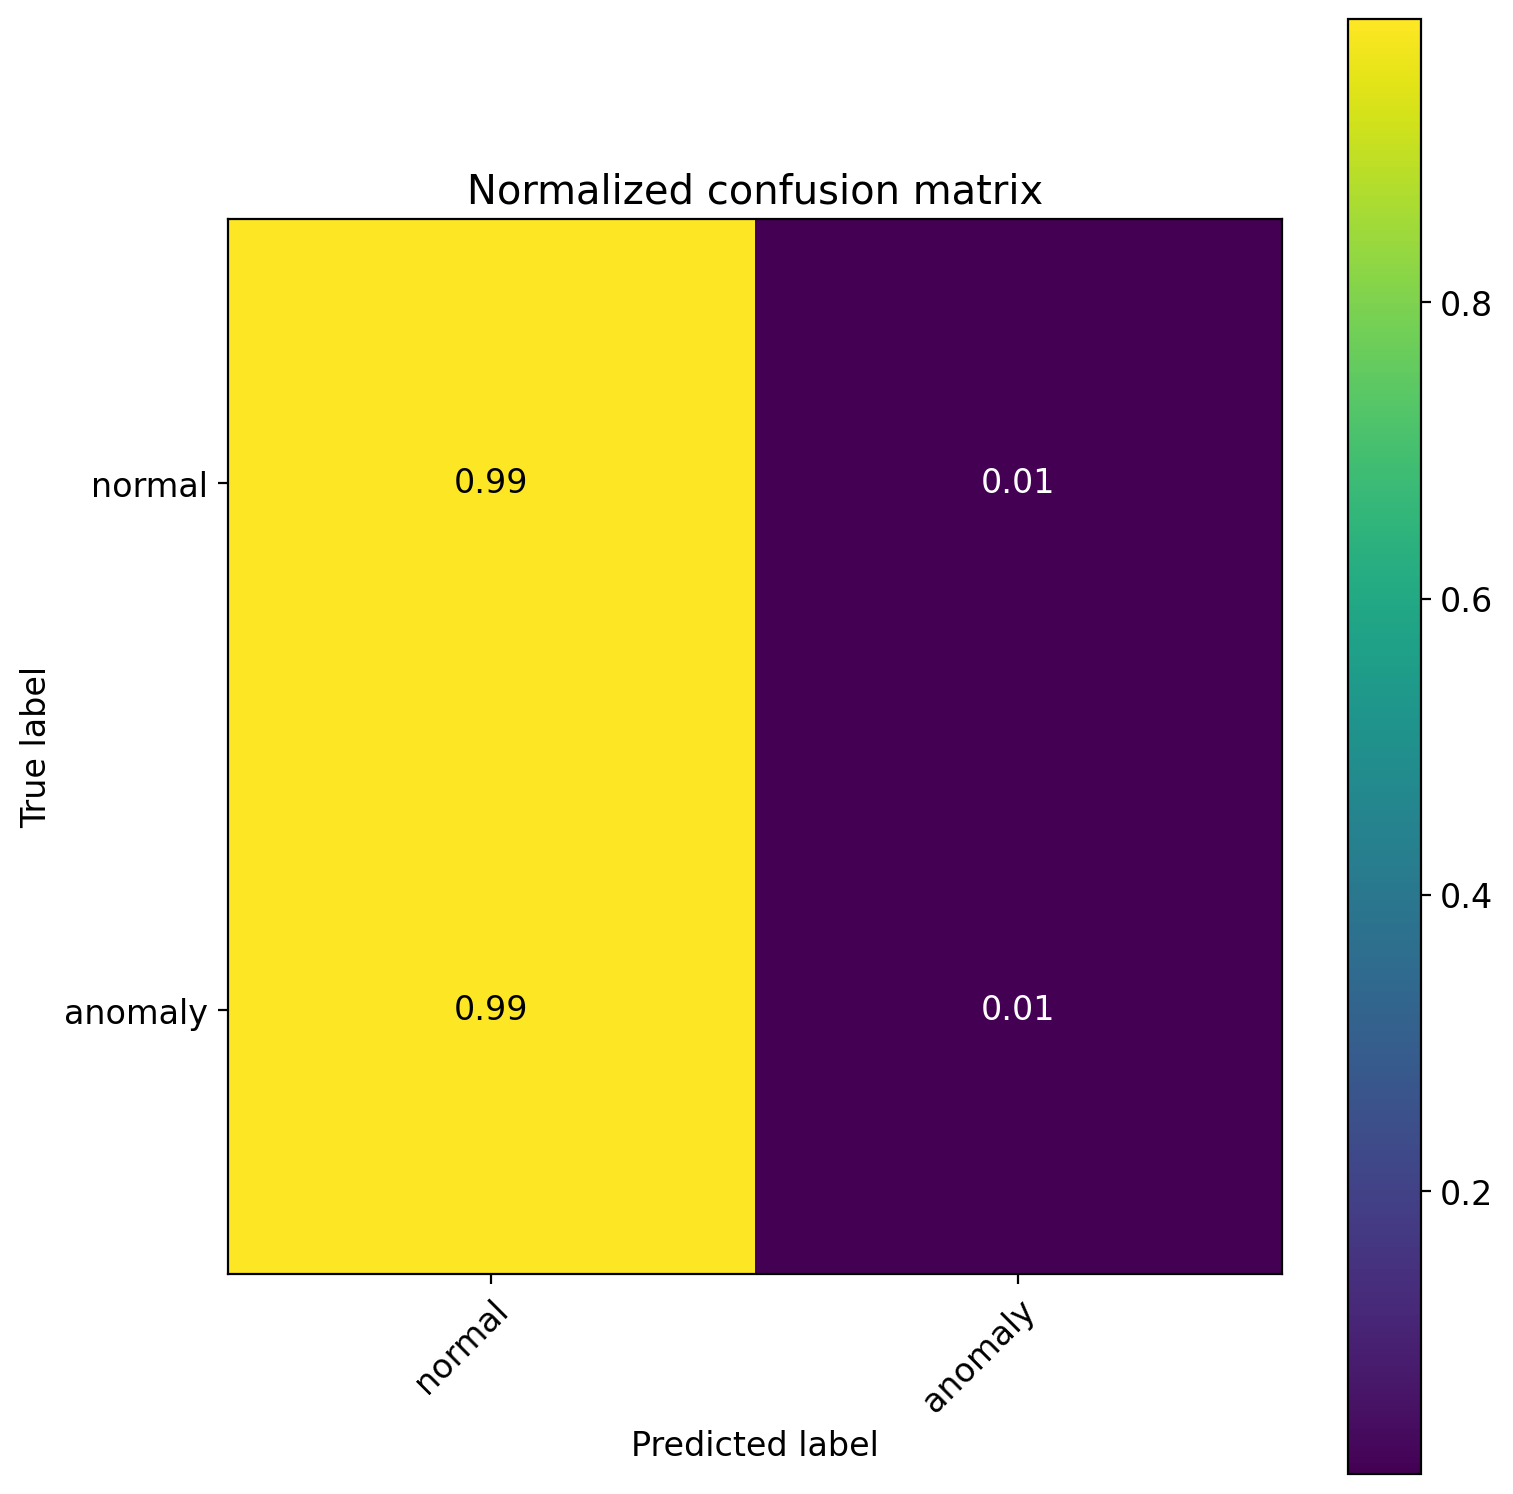

In [17]:
class_names= np.array( ['normal', 'anomaly'] )
plot_conf_mat(true_labels, y_pred, class_names)